# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('wine_clustered.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
X = df.drop(columns=['cluster']) 
y = df['cluster'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

**Random Forest**

In [4]:
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

Random Forest adalah metode ensemble yang membangun beberapa pohon keputusan pada subset data acak, lalu menggabungkan hasilnya untuk meningkatkan akurasi dan stabilitas prediksi. Algoritma ini bekerja dengan memilih subset fitur secara acak di setiap node, yang mengurangi korelasi antar pohon dan menghindari overfitting.

Parameter utama yang digunakan:

- random_state=42: Menjaga konsistensi hasil.
- n_estimators=100: Jumlah pohon dalam hutan.
- max_depth=10: Batas kedalaman tiap pohon untuk menghindari overfitting.

In [5]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [6]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [7]:
# Menghitung akurasi untuk data latih dan data uji
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Menghitung F1-Score berbobot untuk data latih dan data uji
train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')

# Menampilkan hasil akurasi dan F1-Score untuk data latih dan uji
print("Akurasi Data Latih:", train_acc)
print("Akurasi Data Uji:", test_acc)
print("F1-Score Data Latih:", train_f1_score)
print("F1-Score Data Uji:", test_f1_score)

Akurasi Data Latih: 1.0
Akurasi Data Uji: 0.9629629629629629
F1-Score Data Latih: 1.0
F1-Score Data Uji: 0.9628159905937684


In [8]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      1.00      1.00        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



In [9]:
if train_acc >= 0.87 and test_acc >= 0.87 and train_f1_score >= 0.87 and test_f1_score >= 0.87:
    print("Model Sudah bagus")
else:
    print("Model perlu tuning.")
     

Model Sudah bagus


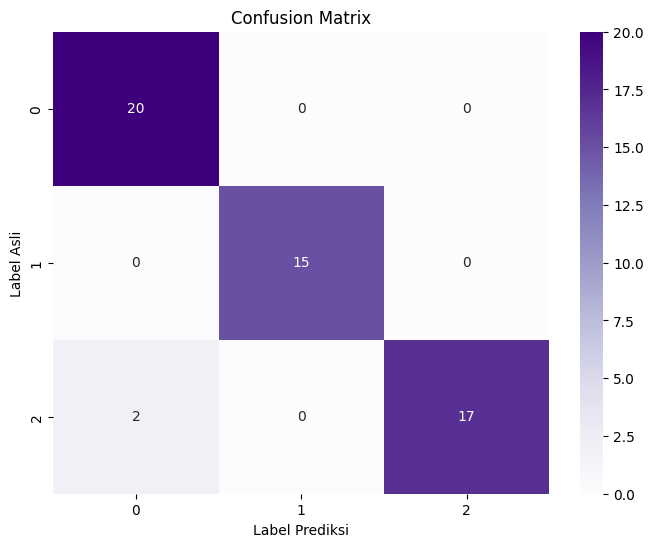

In [10]:
# Menghitung Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Memvisualisasikan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Asli')
plt.title('Confusion Matrix')
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah kesimpulan:

1. **Precision** menunjukkan seberapa akurat model dalam memprediksi kelas positif. Nilai precision yang tinggi menunjukkan bahwa model jarang memberikan hasil positif yang salah. Di sini, precision tertinggi adalah pada kelas 1 dengan nilai 1.00, sedangkan yang terendah adalah pada kelas 0 dengan 0.91.

2. **Recall** mengukur seberapa baik model dalam menangkap semua kelas positif yang ada dalam dataset. Nilai recall yang tinggi berarti model dapat menangkap sebagian besar data yang relevan. Pada kelas 0, recall adalah 1.00, sementara pada kelas 2 adalah 0.89.

3. **F1-score** adalah rata-rata harmonis antara precision dan recall, memberikan gambaran yang lebih baik tentang performa model secara keseluruhan. F1-score tertinggi adalah pada kelas 1 dengan 1.00, dan yang terendah adalah pada kelas 0 dengan 0.95.

4. **Accuracy** model secara keseluruhan adalah 96%, yang menunjukkan bahwa model ini memiliki performa yang sangat baik dalam klasifikasi data.

5. **Macro average** dan **weighted average** menunjukkan rata-rata performa model dalam hal precision, recall, dan f1-score, yang masing-masing bernilai 0.97, 0.96, dan 0.97 untuk macro avg, serta 0.97, 0.96, dan 0.96 untuk weighted avg.

Secara keseluruhan, model ini bekerja sangat baik, dengan akurasi tinggi dan kinerja yang baik di setiap kelas, terutama pada kelas 1.
Confusion matrix juga menunjukkan bahwa model memiliki performa yang baik tanpa indikasi jelas overfitting atau underfitting, selama hasil ini berasal dari data uji.

Rekomendasi Lanjutan : Jika hasil belum memuaskan, pertimbangkan untuk mengumpulkan data tambahan, mencoba algoritma lain, melakukan tuning hyperparameter, menambah atau mengubah fitur, dan menggunakan cross-validation untuk meningkatkan performa model.